In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pylab as plt

# Rejection sampling

### Algoritmus
Předpokládejme, že $\int_a^b f(x)dx = 1$ a zvolme $m > f(x)$ pro všechna $x\in[a,b]$. Vzorkujeme $(x', u) \sim \mathcal{U}(0<u<m)$ tak, že:
   1. Navzorkujeme $x' \sim \mathcal{U}(a, b)$,
   2. navzorkujeme $u|x=x' \sim \mathcal{U}(0, m)$,
   3. vzorek přijmeme, pokud $0<u<f(x')$.

## Příklad

Jako školní příklad budeme generovat `nsamples` vzorků z beta rozdělení `ss.beta` s parametry `a` a `b`. Použijeme pouze základní rejection sampling, zájemci si samostatně zkusí rejection sampling s jinou než rovnoměrnou proposal distribucí.

In [46]:
nsamples = 500     ### Number of samples
M = 3              ### M

a = 2
b = 2

### ZDE DOPLŇTE SVŮJ KÓD
samples_x = ss.uniform.rvs(size=nsamples)# proposal samples
samples_x = np.random.normal(loc=0.5, scale=0.2, size=nsamples)# proposal samples
#samples_u = ss.uniform.rvs(loc=0, scale=M, size=nsamples) # uniform samples
samples_u = ss.uniform.rvs(loc=0, scale=M, size=nsamples) # uniform samples
u_max = M
new_max = ss.norm.pdf(samples_x, loc=0.5, scale=0.2)+0.5
ratio = u_max/new_max
samples_u /= ratio
fx = ss.beta.pdf(samples_x, a=a, b=b)                    # value of f(x)
accepted = np.where(samples_u < fx)[0]              # indices of accepted samples

% acceptance: 0.6520 (326 of 500)


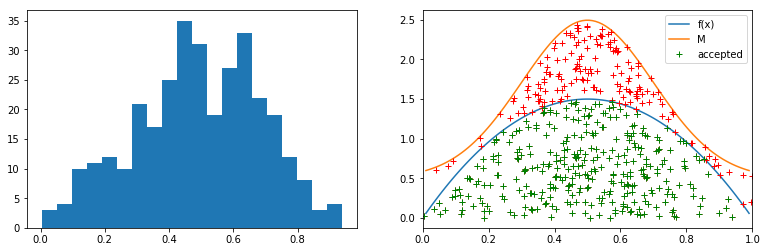

In [47]:
print("% acceptance: {0:.4f} ({1} of {2})".format(accepted.size/nsamples, accepted.size, nsamples))
plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.hist(samples_x[accepted], bins=20)
plt.subplot(122)
x = np.linspace(.01, .99, 100)
plt.plot(x, ss.beta.pdf(x, a=a, b=b), label='f(x)')
plt.plot(x, ss.norm.pdf(x, loc=0.5, scale=0.2)+0.5, label='M')
plt.plot(samples_x, samples_u, 'r+')
plt.plot(samples_x[accepted], samples_u[accepted], 'g+', label='accepted')
plt.xlim(0, 1)
plt.legend()
plt.show()

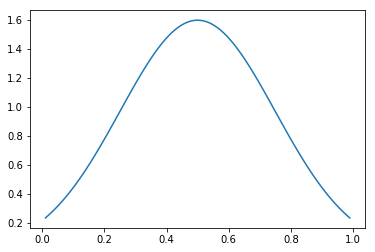

In [17]:
plt.plot(x, ss.norm.pdf(x, loc=0.5, scale=0.25), label='M')